# Librerías

In [1]:
import pandas as pd
from palette_creator import PaletteCreator, show_palette
from pathlib import Path
import cv2
import json

# Funciones auxiliares

In [2]:
def load_img(path_img):
    path_img = str(path_img)
    return cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def save_results_to_db(db, method, results): 
    palettes, proportions = map(list, zip(*results)) # descomprimir una lista de 2-tuplas en 2 listas
    db[f"{method}_palette"], db[f"{method}_proportions"] = palettes, proportions
    db[f"{method}_palette"] = db[f"{method}_palette"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))
    db[f"{method}_proportions"] = db[f"{method}_proportions"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))


# Configuración

In [3]:
# establecer rutas
PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
PATH_IMAGES_METADATA = Path("beatriz_gonzalez.csv")

db = pd.read_csv(PATH_IMAGES_METADATA)
db["path_image"] = PATH_IMAGES_FOLDER/db["filename"]

# Preprocesamiento
Cargar imagenes y aplicarles filtros de ser necesario

In [4]:
%%time
images = [load_img(path_image) for path_image in db["path_image"]] # cargar imagenes en una lista

CPU times: user 1min 5s, sys: 45.4 s, total: 1min 51s
Wall time: 58 s


In [ ]:
# aplicar filtros que homogenicen las imágenes

# Procesamiento Kmeans

In [5]:
pc = PaletteCreator(method="kmeans")

In [6]:
%%time
results = pc.create_palette(images) # crear paletas

CPU times: user 1h 20min 25s, sys: 1h 10min 23s, total: 2h 30min 49s
Wall time: 22min 58s


## Guardar resultados

In [7]:
#save_results_to_db(db, "kmeans", results)
#db.to_csv(PATH_IMAGES_METADATA, index=False)

# Ejemplo de visualización

In [8]:
img_idx = 800 # escoger una imagen(índice de la lista de imagenes)

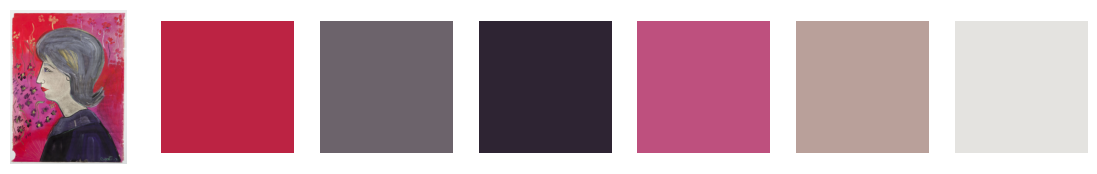

In [9]:
palette_img, proportions_img = results[img_idx]
show_palette(palette_img, img=images[img_idx])